In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt

# Data

### Google

In [44]:
df_google = pd.read_csv('TermometroRsocial.csv')
df_google.head()

,Unnamed: 0,Unnamed: 1,Pais,level_1,date,/g/120ry1nd,isPartial,log,cycle,trend
0,DO,0,DO,0,2010-01-01,0.0,False,-4.605170,-4.589492,-0.015678
1,DO,1,DO,1,2010-02-01,34.0,False,3.526361,2.918081,0.608279
2,DO,2,DO,2,2010-03-01,39.0,False,3.663562,2.507817,1.155745
3,DO,3,DO,3,2010-04-01,20.0,False,2.995732,1.396870,1.598863
4,DO,4,DO,4,2010-05-01,53.0,False,3.970292,2.018720,1.951572


In [45]:
df_google_co = df_google[df_google['Pais'] == 'CO'][['date', '/g/120ry1nd','log','trend']].copy()
df_google_co.columns = ['date', 'risk_index', 'risk_log_index','risk_trend']
df_google_co.reset_index(drop = True, inplace = True)

In [46]:
type(df_google_co.at[0,'date'])

str

In [47]:
# group by month
df_google_co['date_m'] = pd.to_datetime(df_google_co['date']).dt.to_period('M')
df_google_co

,date,risk_index,risk_log_index,risk_trend,date_m
0,2010-01-01,4.0,1.386294,1.993325,2010-01
1,2010-02-01,12.0,2.484907,2.003520,2010-02
2,2010-03-01,10.0,2.302585,2.003598,2010-03
3,2010-04-01,8.0,2.079442,1.991465,2010-04
4,2010-05-01,9.0,2.197225,1.970009,2010-05
...,...,...,...,...,...
153,2022-10-01,19.0,2.944439,2.881375,2022-10
154,2022-11-01,34.0,3.526361,2.893014,2022-11
155,2022-12-01,6.0,1.791759,2.905737,2022-12
156,2023-01-01,13.0,2.564949,2.933610,2023-01


In [48]:
df_google_co_m = df_google_co.groupby('date_m')[['risk_index', 'risk_log_index','risk_trend']].mean().reset_index()

### EMBI

In [49]:
df_embi = pd.read_excel('embi.xlsx')
df_embi_co = df_embi[['Fecha', 'Colombia']].copy()
df_embi_co.columns = ['date', 'embi']
df_embi_co.head()

,date,embi
0,2007-10-29 00:00:00,1.60120
1,2007-10-30 00:00:00,1.57447
2,2007-10-31 00:00:00,1.47853
3,2007-11-01 00:00:00,1.60699
4,2007-11-02 00:00:00,1.68363


In [50]:
df_embi_co['date_m'] = pd.to_datetime(df_embi_co['date']).dt.to_period('M')
df_embi_co

,date,embi,date_m
0,2007-10-29 00:00:00,1.60120,2007-10
1,2007-10-30 00:00:00,1.57447,2007-10
2,2007-10-31 00:00:00,1.47853,2007-10
3,2007-11-01 00:00:00,1.60699,2007-11
4,2007-11-02 00:00:00,1.68363,2007-11
...,...,...,...
3827,2023-02-23 00:00:00,3.94760,2023-02
3828,2023-02-24 00:00:00,3.91042,2023-02
3829,2023-02-27 00:00:00,3.86666,2023-02
3830,2023-02-28 00:00:00,3.93189,2023-02


In [51]:
df_embi_co_m = df_embi_co.groupby('date_m')[['embi']].mean().reset_index()
df_embi_co_m

,date_m,embi
0,2007-10,1.551400
1,2007-11,1.961908
2,2007-12,1.881167
3,2008-01,2.408224
4,2008-02,2.493140
...,...,...
181,2022-11,4.174174
182,2022-12,3.823606
183,2023-01,3.708017
184,2023-02,3.829981


### FX

In [52]:
df_fx = pd.read_excel('tcs_yahoo.xlsx')
df_fx.drop(columns = ['Unnamed: 0'], inplace = True)
df_fx_co = df_fx[['date', 'FX_Colombia']]
df_fx_co.columns = ['date', 'fx']
df_fx_co.head()

,date,fx
0,2011-03-02,1917.25
1,2011-03-03,1906.00
2,2011-03-04,1889.00
3,2011-03-07,1895.00
4,2011-03-08,1889.00


In [53]:
df_fx_co['date_m'] = pd.to_datetime(df_fx_co['date']).dt.to_period('M')
df_fx_co_m = df_fx_co.groupby('date_m')[['fx']].mean().reset_index()
df_fx_co_m

<ipython-input-53-85d74f731975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fx_co['date_m'] = pd.to_datetime(df_fx_co['date']).dt.to_period('M')


,date_m,fx
0,2011-03,1872.958692
1,2011-04,1800.084998
2,2011-05,1797.954351
3,2011-06,1774.315912
4,2011-07,1758.171427
...,...,...
140,2022-11,4916.799827
141,2022-12,4786.089910
142,2023-01,4709.914262
143,2023-02,4777.322949


In [54]:
df_dollar = pd.read_excel('dollar_index.xlsx')
df_dollar['date_str'] = df_dollar['date'].astype(str)
df_dollar.head()

,date,DXY,date_str
0,2010-01-01,NaN,2010-01-01
1,2010-01-04,92.3566,2010-01-04
2,2010-01-05,92.2236,2010-01-05
3,2010-01-06,92.0941,2010-01-06
4,2010-01-07,92.3684,2010-01-07


In [55]:
df_dollar['date_m'] = pd.to_datetime(df_dollar['date']).dt.to_period('M')
df_dollar_m = df_dollar.groupby('date_m')[['DXY']].mean().reset_index()
df_dollar_m

,date_m,DXY
0,2010-01,92.406625
1,2010-02,94.039250
2,2010-03,93.149878
3,2010-04,92.639086
4,2010-05,95.567571
...,...,...
153,2022-10,127.399195
154,2022-11,124.759232
155,2022-12,122.191027
156,2023-01,119.819295


### Inflacion

In [56]:
df_cpi = pd.read_excel('inflacion_col.xlsx')
df_cpi.head()

,fecha,inflacion
0,1993-01-01,0.2482
1,1993-02-01,0.2471
2,1993-03-01,0.2418
3,1993-04-01,0.2308
4,1993-05-01,0.2221


In [57]:
df_cpi['date_m'] = pd.to_datetime(df_cpi['fecha']).dt.to_period('M')
df_cpi_m = df_cpi.groupby('date_m')[['inflacion']].mean().reset_index()
df_cpi_m

,date_m,inflacion
0,1993-01,0.2482
1,1993-02,0.2471
2,1993-03,0.2418
3,1993-04,0.2308
4,1993-05,0.2221
...,...,...
356,2022-09,0.1144
357,2022-10,0.1222
358,2022-11,0.1253
359,2022-12,0.1312


# Wrangle

In [58]:
df_merge1 = df_google_co_m.merge(df_embi_co_m, how = 'inner', on='date_m')
df_merge2 = df_merge1.merge(df_fx_co_m, how = 'inner', on='date_m')
df_merge3 = df_merge2.merge(df_dollar_m, how = 'inner', on='date_m')
df_merge4 = df_merge3.merge(df_cpi_m, how = 'inner', on='date_m')
df_merge4

,date_m,risk_index,risk_log_index,risk_trend,embi,fx,DXY,inflacion
0,2011-03,10.0,2.302585,1.985611,1.551506,1872.958692,88.487226,0.0319
1,2011-04,9.0,2.197225,2.006170,1.516138,1800.084998,86.921367,0.0284
2,2011-05,10.0,2.302585,2.015562,1.472593,1797.954351,86.946682,0.0302
3,2011-06,5.0,1.609438,2.016626,1.447030,1774.315912,86.941255,0.0323
4,2011-07,6.0,1.791759,2.016985,1.418823,1758.171427,86.319876,0.0342
...,...,...,...,...,...,...,...,...
138,2022-09,27.0,3.295837,2.867312,4.236795,4444.052827,125.424432,0.1144
139,2022-10,19.0,2.944439,2.881375,4.714402,4715.983352,127.399195,0.1222
140,2022-11,34.0,3.526361,2.893014,4.174174,4916.799827,124.759232,0.1253
141,2022-12,6.0,1.791759,2.905737,3.823606,4786.089910,122.191027,0.1312


In [60]:
df_merge4['log_fx'] = np.log(df_merge4['fx'])
df_merge4['log_DXY'] = np.log(df_merge4['DXY'])
df_merge4.columns

Index(['date_m', 'risk_index', 'risk_log_index', 'risk_trend', 'embi', 'fx',
       'DXY', 'inflacion', 'log_fx', 'log_DXY'],
      dtype='object')

In [62]:
df_final = df_merge4[['date_m', 'risk_log_index', 'risk_trend', 'embi', 'inflacion', 'log_fx', 'log_DXY']]

In [94]:
df_final.to_excel('data_riesgo_social_col.xlsx')

# EDA

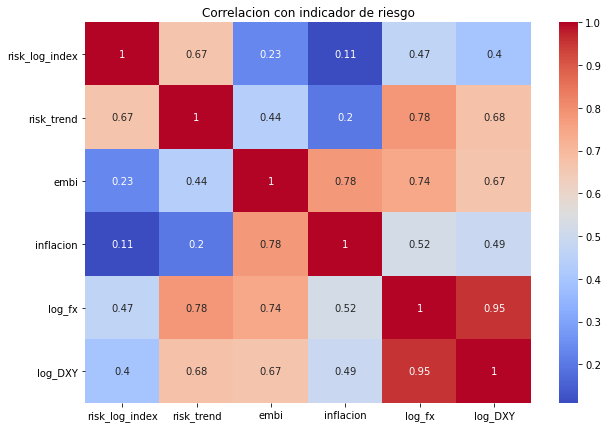

In [65]:
df_correl = df_final.corr()
plt.figure(figsize = (10,7))
sns.heatmap(df_correl, annot=True,cmap = 'coolwarm')
plt.title('Correlacion con indicador de riesgo')
plt.show()

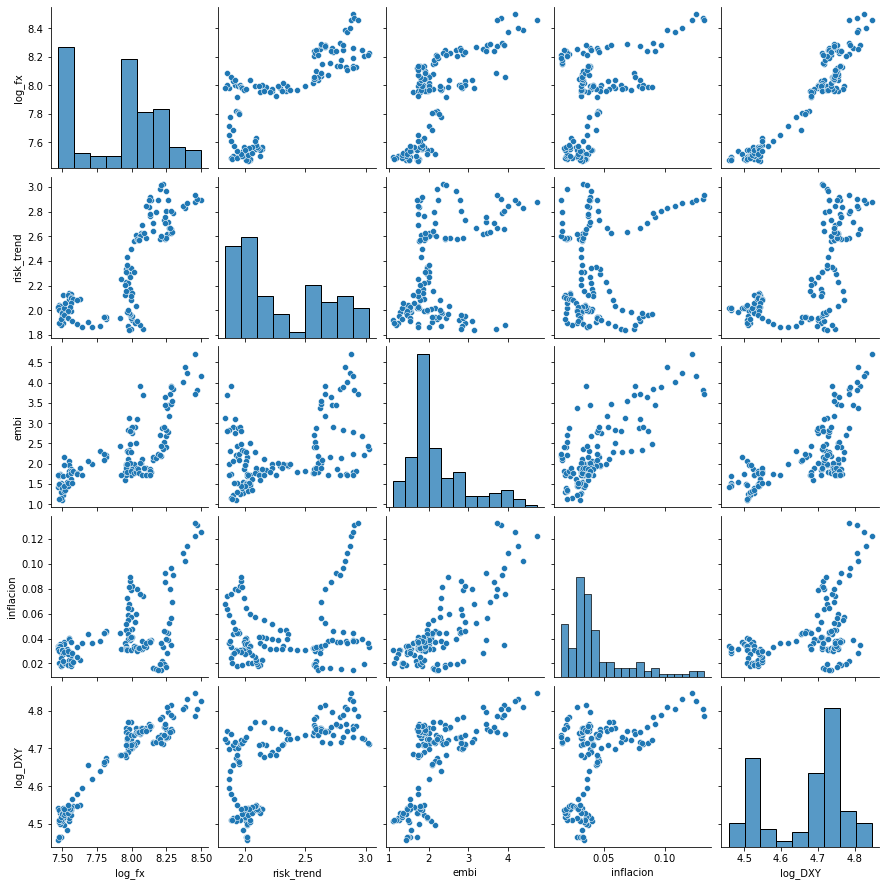

In [77]:
sns.pairplot(df_final[[ 'log_fx', 'risk_trend', 'embi', 'inflacion',  'log_DXY']])
plt.show()

# Causality

In [78]:
from statsmodels.tsa.stattools import grangercausalitytests

In [80]:
df_final.columns

Index(['date_m', 'risk_log_index', 'risk_trend', 'embi', 'inflacion', 'log_fx',
       'log_DXY'],
      dtype='object')

In [81]:
data = df_final[['risk_trend', 'embi', 'inflacion', 'log_fx',
       'log_DXY']].copy()

In [86]:
gc_res = grangercausalitytests(data[['risk_trend', 'log_fx']], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1211  , p=0.1475  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=2.1668  , p=0.1410  , df=1
likelihood ratio test: chi2=2.1505  , p=0.1425  , df=1
parameter F test:         F=2.1211  , p=0.1475  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.5202  , p=0.0001  , df_denom=136, df_num=2
ssr based chi2 test:   chi2=19.7405 , p=0.0001  , df=2
likelihood ratio test: chi2=18.4754 , p=0.0001  , df=2
parameter F test:         F=9.5202  , p=0.0001  , df_denom=136, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4448  , p=0.2326  , df_denom=133, df_num=3
ssr based chi2 test:   chi2=4.5626  , p=0.2068  , df=3
likelihood ratio test: chi2=4.4898  , p=0.2132  , df=3
parameter F test:         F=1.4448  , p=0.2326  , df_denom=133, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0671  , p=0.0888  

In [88]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [93]:
maxlag = 12
test = 'ssr_chi2test'
grangers_causation_matrix(data, variables = data.columns)  

,risk_trend_x,embi_x,inflacion_x,log_fx_x,log_DXY_x
risk_trend_y,1.0000,0.0089,0.0056,0.0001,0.0046
embi_y,0.0687,1.0000,0.0142,0.1430,0.0488
inflacion_y,0.0129,0.0001,1.0000,0.0736,0.3326
log_fx_y,0.0104,0.3057,0.1845,1.0000,0.0003
log_DXY_y,0.0788,0.5855,0.0311,0.0273,1.0000


Assuming a significance level of 0.05, if the p-value is lesser than 0.05, then we do NOT reject the null hypothesis that X does NOT granger cause Y. 

If p-value <= $\alpha$, $x$ causes $y$

* Risk trend causes fx
* Risk trend causes inflation
* Risk trend causes embi if $\alpha$ = 0.1
* Embi does not cause fx
* Inflation causes embi

# Lag order